# Data Visualization Assignment 1 - Jesper Provoost (s1789198)

From the Worldbank Data, I have chosen the dataset about access to electricity as my base dataset. This dataset contains the percentage of a population that has access to electricity. I was very curious about this indicator and its possible correlations with other datasets.

Firstly, I had to wrangle and clean the data since it was not properly formatted. Also, there were some missing (NaN) values. I did this using the Trifacta Wrangler software.To explore the possible causalities and connections with other data, I added some other datasets from Worldbank (i.e. about GDP/capita, urban population and renewable energy usage) to the electricity access dataset. The wrangled datasets were combined, and then exported in CSV format using the Trifacta software.

**Note:** I added .GIF images of the interactive visualizations with a slider widget. I did this, because it is impossible to share these with you without running a Bokeh server. Since this was not possible for me, I just ran the code on my own machine and then recorded the function of these interactive plots.

### *Access to electricity is not a universal privilege*

To explore the electricity access data per country, I imported the dataset into Tableau. Then I created a world map which shows the percentage of population which has access to electricity per country. This visualization perfectly which countries still have little access to electricity. Since we live in the Western world, we are used to electronic devices being around all day long. Electricity has even resulted in many more conveniences in our lives. It is very enlightning to see that electricity, which is the base of many innovations, is not even present in some countries. Apparently electricity is not a right, but just a privilege that rich countries share.

In [25]:
%%HTML
<div class="flourish-embed" data-src="visualisation/46846"></div><script src="https://public.flourish.studio/resources/embed.js"></script>

Then I imported the CSV file into a Pandas DataFrame, which makes it easy to work with the data in Python to obtain some more advanced visualizations.

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('Data.csv')

I decided to work with Bokeh to create visualizations. Since I have been learning Python for the last months, I wanted to learn more about specific Python tools for data visualization and analytics. I discovered that Bokeh is a great tool for creating interactive visualizations, for example using tooltips, widgets and animations. I truly believe that these interactive visualization could help people understand the message of my data better and quicker, which is why I am very eager to learn about a framework like Bokeh.

In [8]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, ColorBar, Diamond, LinearColorMapper, GeoJSONDataSource
from bokeh.layouts import Column
from bokeh.palettes import RdYlGn
from ipywidgets import interact, IntSlider

### *Availability of electricity is improving worldwide, but not as fast as intended*
From the geographic visualization shown before, we can easily see that there are a lot of countries which have already 100% availability of electricity. Therefore, it is interesting to look at the increase of electricity access in the countries lagging behind. The mean percentage of all countries is thus taken per year (using an aggregate function) and plotted into a line graph. This graph shows clearly that the availability of electricity has greatly improved over the course of 26 years: there has been an increase of 16.8% in the mean percentage around the world. 

The United Nations specify certain development goals which should be achieved globally. One of these goals is the Sustainable Development Goal 7, which specifies that everyone should have access to affordable, reliable and modern energy by 2030. Starting from the reference point in 1990, the dotted line shows the projected path towards this goal. Unfortunately, it is clear that the we have not been able to keep up with the necessary growth. This shows that the goal cannot be achieved as long as the growth of electricity access is not accelerated. In conclusion: even though access to electricity has greatly increased and will continue to grow, there is still a lot of work to be done.

In [23]:
avg_per_year = ColumnDataSource(data.groupby(["year"]).mean())

hover = HoverTool(tooltips=[("Year", "@year"),("Electricity access", "@electricityAccess%")],names=["access"])

plot_access = figure(title="Development of electricity access from 1990 to 2016", plot_width=800, plot_height=300, x_axis_label='Year', y_axis_label='Mean access to electricity (%)', tools=[hover])
plot_access.line("year", "electricityAccess", source=avg_per_year, color="blue", line_width=3, line_alpha=0.5, name="access", legend="World Bank Historical Data")
plot_access.line([1990,2016],[66.851,88.264], color="grey", line_dash="dotted", legend="UN Development Goal Projection")

plot_access.legend.location = "top_left"
plot_access.legend.click_policy="hide"

output_notebook()
show(plot_access)

Loading BokehJS ...

While the above visualization shows the general trend, it is also good to look at the development of the individual countries between 1990 and 2016. By plotting this data with arrows, it is possible to see if a country experienced growth or decline over the years, and the magnitude of this change. Also it is easy to quickly derive the exact electricity access percentages per country from 1990 and 2016 using the interactive tooltip (just hover the bars).

From this figure, it is very clear that almost every country experienced an increase of electricity access over the years. For example, countries like Afghanistan, Bhutan and Nepal went from nothing to having availability of energy in (almost) the whole country. A few countries (e.g. Djibouti and Surinam) experienced a decline, but they are an exception to the rule. For example, in the case of Djibouti this decline can be explained by the Djiboutian Civil War which took place from 1991 to 1994 and ravaged the country.

In [22]:
access_by_country = data.pivot(index="Country_Name", columns="year", values="electricityAccess").groupby(["Country_Name"]).mean().reset_index().sort_values(1990, ascending=False).dropna()
access_by_country = access_by_country[access_by_country[2000]!=100]
access_by_country.columns = access_by_country.columns.astype(str)

country_list = access_by_country["Country_Name"].unique()
hover = HoverTool(tooltips=[("Country", "@Country_Name"),("Access in 1990", "@1990%"),("Access in 2016", "@2016%")],names=["bar"])

p = figure(title="Growth of electricity access per country between 1990 and 2016",y_range=country_list, x_range=(0,100), plot_width=800, plot_height=2000, outline_line_color=None,tools=[hover])
p.hbar(y="Country_Name", left="1990", right="2016", height=0.5, source=ColumnDataSource(access_by_country), name="bar")
p.diamond(x="2016",y="Country_Name",angle=4.71,size=10,source=ColumnDataSource(access_by_country))

show(p)

### *Electricity is a crucial factor for the prosperity of a country*
It is notable that almost all countries with lacking access to electricity are located around the equator; mostly on the continent of Africa. This makes us suspect that the prosperity of a country is correlated with its availability of electricity. A reliable and accurate indicator for the prosperity of a country is the GDP per capita. A visualization was made with the GDP per capita and electricity access data on both axes. Lines then denote each country's development between 1990 and 2016, and the circles denote the data of 2016 of each country (which automatically means that each circle is the end of a line). By hovering the circles, the exact data can be observed.

This visualization is very functional and enlightning as it shows that electricity is a crucial factor for the prosperity of a country. The circles and lines all run along the x-axis and go up sharply at 100% electricity access, which shows that there are no countries with low electricity access which have a high GDP. It is easy to see that all countries with a high GDP have 100% electricity access. However, not all countries with 100% electricity access have a high GDP. This supports the claim that nationwide electricity access is crucial for having a high GDP, and therefore the prosperity of a country. In conclusion: the impact of electricity access on a country's welfare should never be underestimated.

In [12]:
hover = HoverTool(tooltips=[("Country", "@Country_Name"),("Electricity access", "@electricityAccess%"),("GDP per capita", "@gdpPerCap{int}$")],names=["circle"])

plot_correlation = figure(title="Correlation between GDP per capita and access to electricity",width=900,height=400, x_axis_label='Access to electricity (%)', y_axis_label='GDP per capita ($)', tools=[hover])
plot_correlation.left[0].formatter.use_scientific = False

for x in data["Country_Name"].unique():
    plot_correlation.line("electricityAccess","gdpPerCap",source=ColumnDataSource(data[data["Country_Name"]==x]),line_alpha=0.2,color="green")

plot_correlation.circle("electricityAccess","gdpPerCap",source=ColumnDataSource(data[data["year"]==2016]),line_alpha=0.3,color="green",name="circle")

show(plot_correlation)

### *In urbanized countries, more people have access to electricity*
From socio-geographical point of view, it is straightforward that inhabitants of cities have more chance of having electricity than inhabitants of rural areas. Since people in cities live closely together (mostly on flat terrain), it is easier to connect all of them to electricity. Also, the priority of the government is likely to be the urban population since it involves the most people. 

In the visualization below, this pattern is clearly visible. The countries (denoted by circles) are mostly located around the y=x line, which shows that there is a correlation between urban population and electricity access. More specifically: the more urbanized a country is, the higher its access to electricity will be. The size of the circles is dependent of the GDP per capita. It is very insightful to see that most countries with a high GDP have high accessibility to electricity and are highly urbanized.

In [13]:
hover = HoverTool(tooltips=[("Country", "@Country_Name"),("Electricity access", "@electricityAccess%"),("Urban population", "@urbanPopulation%"),("GDP per capita", "@gdpPerCap{int}$")])

source = ColumnDataSource(data.groupby("Country_Name").mean())

plot_correlation = figure(title="Correlation between urban population and electricity access", x_axis_label='Access to electricity (%)', y_axis_label='Urban population (%)', x_range=(-5,105), y_range=(-5,105),tools=[hover])
plot_correlation.scatter("electricityAccess","urbanPopulation",fill_alpha=0.2,radius="radius",source=source, color="purple")

show(plot_correlation)

The following visualization resembles the previous one and uses the same datasets. However, in the previous visualization, a mean aggregate function was applied, whereas now the data is dynamically shown per year. This visualization makes it perfectly clear that most countries progressively become more urbanized and get more access to electricity (the circles move along the y=x line). This visualization therefore also shows the correlation between the urbanization and accessibility of electricity within a country. Furthermore, the circles of countries in the top right corner (urbanized and already rich countries) grow significantly over the course of 26 years (even more than less developed countries) which means that their GDP is increasing. Also, it again shows the general increase of electricity access around the world and the growing concentration of rich (high GDP) countries with 100% electricity access.

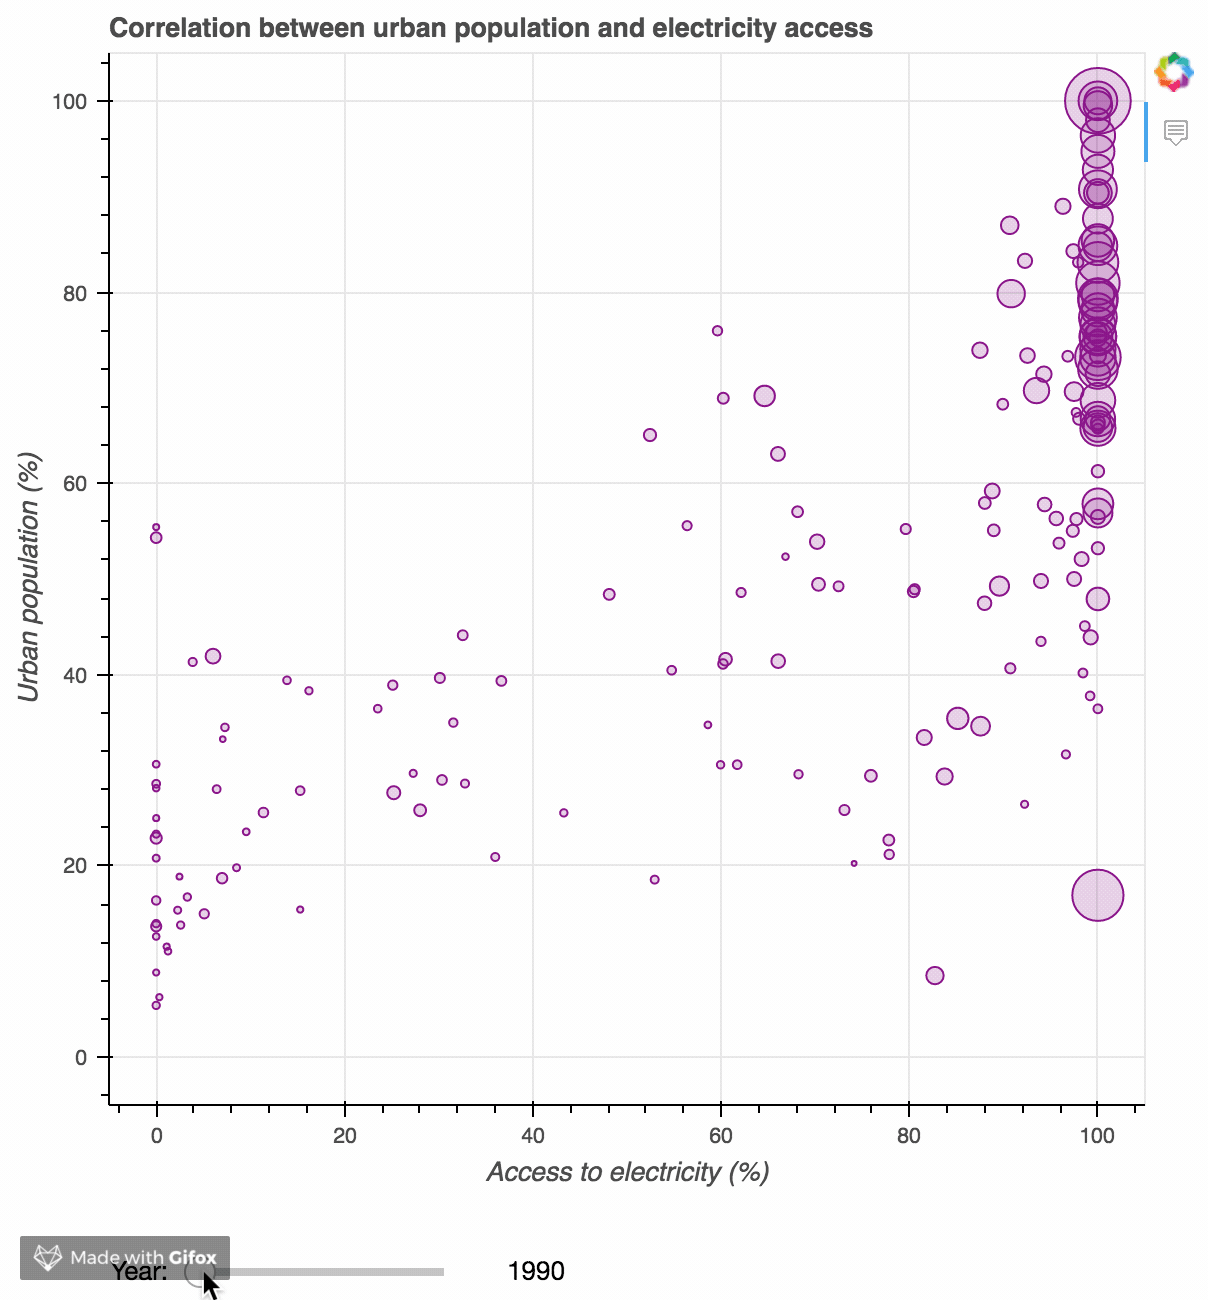

In [30]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/jcprovoost/DataVisualization/master/vis1.gif",width=600, height=600)

### *What can we learn from developing countries?*

In developed countries, we often think that the rest should just follow our example. This is understandable, since the earlier graphs indicated that underdeveloped countries are always the ones who lag behind in terms of electricity access. However, when combining the base dataset with one about the use of renewable energy, I was surprised by the outcome. As in previous graphs, the size of the circle denotes the GDP per capita of a certain country. The circles are also colour-coded based on the use of sustainable energy sources (as % of the total energy consumption), with green denoting a high percentage and red denoting a low percentage.

There is a clear pattern visible which suggests that countries with a lower electricity access use a lot more renewable energy, wheras countries with high electricity access mostly consume exhaustive, non-renewable energy. This might be caused by the fact that countries like Burundi and Congo simply do not have the natural resources for generating electricity - otherwise they would have used them (which would have caused a higher electricity access). Still, however, these patterns suggest that we should not underestimate the sustainable energy methods which these countries rely upon. Instead, we could learn from them to make our energy usage more sustainable.

In [24]:
source = ColumnDataSource(data.groupby("Country_Name").mean())
mapper = LinearColorMapper(palette=RdYlGn[10], low=data.renewableEnergy.max(), high=data.renewableEnergy.min())

hover = HoverTool(tooltips=[("Country", "@Country_Name"),("Electricity access", "@electricityAccess%"),("Renewable energy usage", "@renewableEnergy%"),("GDP per capita", "@gdpPerCap{int}$")])

plot_correlation = figure(title="Do developing countries lead the way towards sustainable energy?", x_axis_label='Access to electricity (%)', y_axis_label='Use of renewable energy sources (%)', width=600, height=600, x_range=(-5,105), y_range=(-5,105),tools=[hover])
s = plot_correlation.circle("electricityAccess","renewableEnergy",fill_alpha=0.2,radius="radius",source=source, color={'field': 'renewableEnergy', 'transform': mapper})

show(plot_correlation)

Whereas in the above visualization the mean of the years 1990 to 2016 was taken, the next graph will show a dynamic visualization of the data per year. This visualization shows that countries with increasing electricity access seem to use less renewable energy sources. However, there is also a significant amount of countries which moves to the right (higher electricity access) while keeping a high use of renewable energy sources. This supports the claim that these countries are actually pioneers in terms of sustainable energy usage. It might surprise you, but the countries in red (with high GDP and high electricity access) should learn from these developing countries.

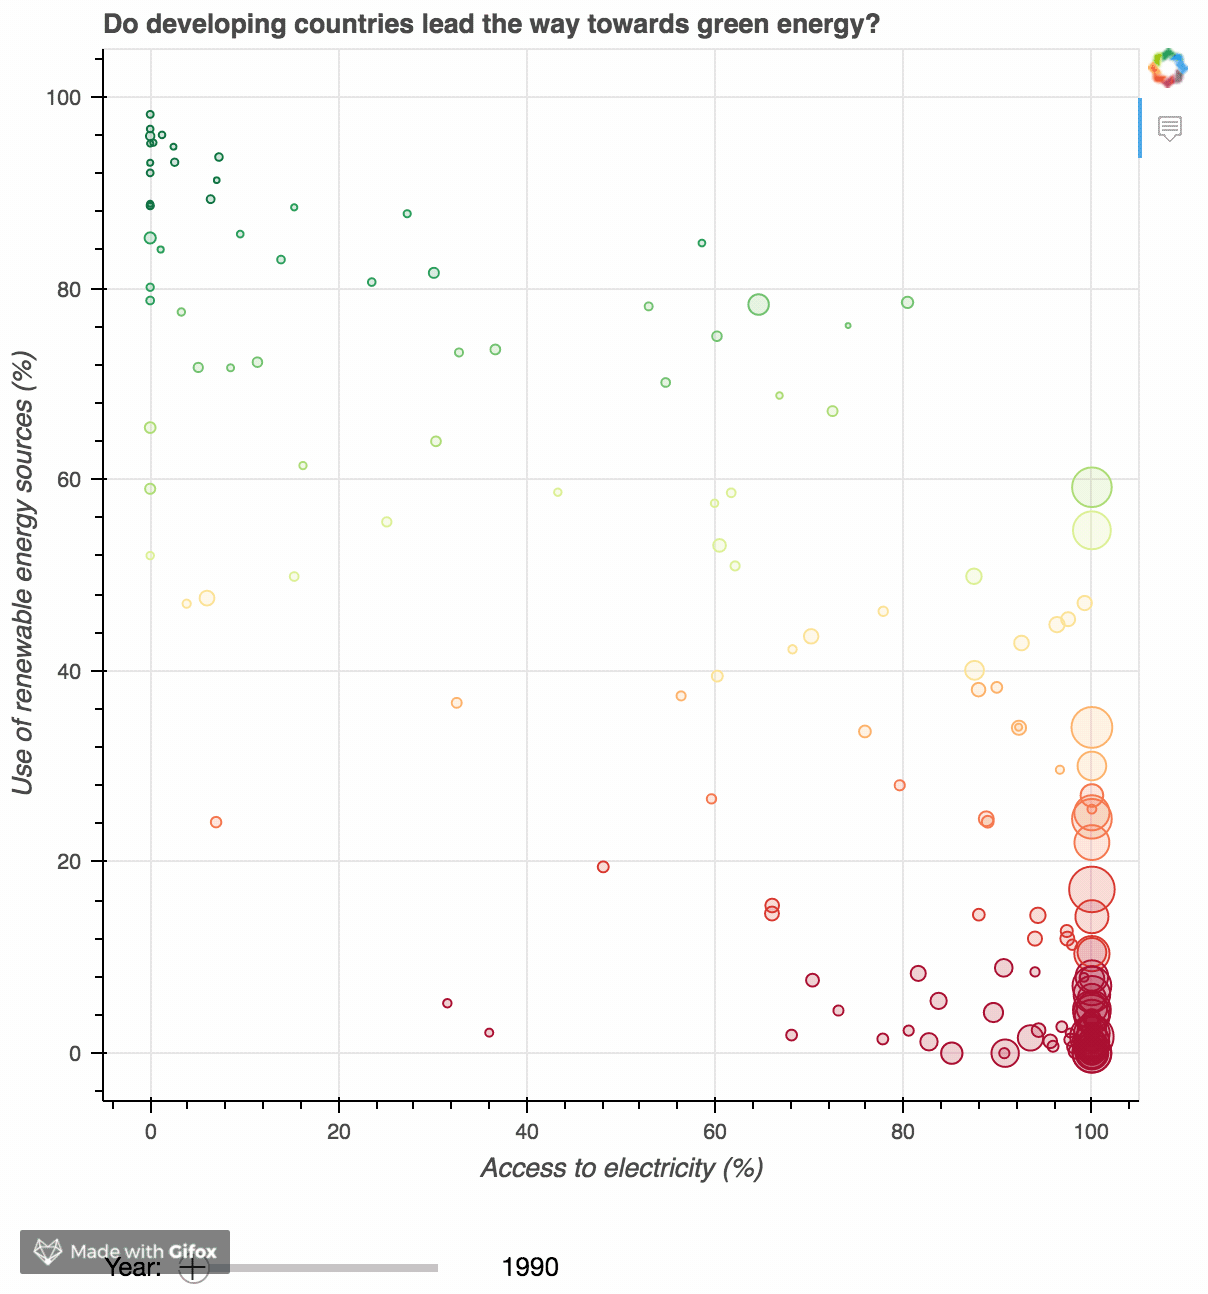

In [29]:
Image("https://raw.githubusercontent.com/jcprovoost/DataVisualization/master/vis2.gif",width=600, height=600)

# Questions
#### Why did I pick this particular visual encoding?
I picked the red colors on the map, because it perfectly contrasted and highlighted the countries with less electricity access. This method makes sure that the attention of the viewer goes to these countries, while the rest of the countries (which have up to 100% access) is more on the background. The viewer then clearly recognized that the countries in e.g. Mid-Africa are less developed, for which red is a suitable color since I believe it will evoke a more serious attitude from the reader.

Concerning the second visualization, I picked the blue line color because it was easily distinguishable from the dotted line. Also, I increased the thickness to make it stand out compared to the UN projection line.

I picked horizontal bars with arrows to visualize the growth per country, because I think this makes it very easy to derive whether a country's electricity access has grown or declined. Since the plot is very long (vertically), I made sure that the exact numbers can be viewed using a tooltip by hovering over a certain bar.

For the scatter plots, I decided to use circles with a lowered opacity so that the density in particular areas would be observable. It seemed straightforward to use the radius of the circles to visualize the GDP per capita, since a larger circle would give the impression of an economically larger country. In the last visualization, I used the red-to-green color scheme since I wanted to visualize the usage of sustainable energy (vs. worse forms of energy). Sustainable energy is also seen as 'green' energy, whereas non-renewable energy sources are generally seen as bad energy sources (which fits the color red).

#### Are the visualizations truthful?
Almost all visualizations in this assignment are truthful. The data is all represented on linear axes and on a linear time scale. I generally used no tricks or modifications to make the data fit my message better, since I was quite sure that the data would be more clear and insightful if it were presented in a truthful way. However, concerning the circle size (which denoted GDP per capita) in some graphs, I used a trick which makes the data partly non-truthful. Since there were huge differences in GDP/cap data between different countries, the difference in circle radius would be too large. This would lead to unclear graphs (countries would be too small or way too large). To solve this, I applied the function y=sqrt(x) to the circle radius data. This function makes sure that the differences in GDP/cap are still visible, while keeping the visualization as clear and efficient as possible.

#### Are the visualizations functional?
Yes, I believe that every visualization is functional in its own right. The first chart shows the world map of electricity access, which is useful to diagnose that not every country in the world has complete access to electricity. From there on, the visualizations become more detailed and give more information about a specific trend or correlation. I wanted to slowly introduce the reader to the topic, and therefore I believe that every visualization has a function towards conveying the message to the reader.

#### Are the visualizations insightful?
Yes, I believe that the visualizations are all insightful, since I have created them such that they would contribute to the message I want to convey. More info about these insights is given in the descriptions of the visualizations.

#### Are the visualizations enlightning?
One visualization might be more enlightning than the other, since e.g. the first visualization gives a more general overview of all countries and their percentages. Also, for example, the chart with the growth of individual countries is less enlightning because the readers have already observed (in the graph before) that the general electricity access was growing. However, I do think that the following points are enlightning and carry the message I want to bring across:

1) The map clearly shows the large difference in electricity access between some parts of the world. In the developed world, we have become so used to electronic devices, that it is shocking to see that there are many countries without these options.

2) Even though electricity access is growing significantly around the world (which most people would expect), we are still not on track for reaching the development goal of 100% access in 2030. The graph visualizes this clearly which is enlightning.

3) Electricity access is, just like for example water, a vital part in a country's development and an important ingredient towards prosperity. It is definitely enlightning to see that only countries with 100% electricity access can become prosperous.

4) Developing countries use more sustainable sources of energy, even though their need for energy might be higher in order to provide everyone with electricity. It is enlightning to observe that these countries can satisfy almost all their energy necessities with green energy, while developed countries are using exhaustive and non-durable methods. It shows that we can learn from them, even though we would not expect this.
